In [1]:
# Import Libraries
import tensorflow as tf
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load and Resize Images
folder_path = "D:\\ML Datasets\\ISEF_24-25_Pharyngitis\\Mendeley&Kaggle Pharyngitis Dataset"
files_list = glob.glob(os.path.join(folder_path, '**', '*.jpg'), recursive=True)

images, labels12 = [], []
for file in files_list:
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    resized_image = cv2.resize(image, (64, 64))
    images.append(resized_image)
    dirname = os.path.dirname(file)
    labels12.append(os.path.basename(dirname))

# Preprocessing (ensure this matches model training!)
images = np.array(images, dtype='float32') / 127.5 - 1  # Assuming model uses [-1,1] normalization
labels = np.array(labels12, dtype=str)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Encode Labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train))

5/5 [==============================] - 1s 67ms/step


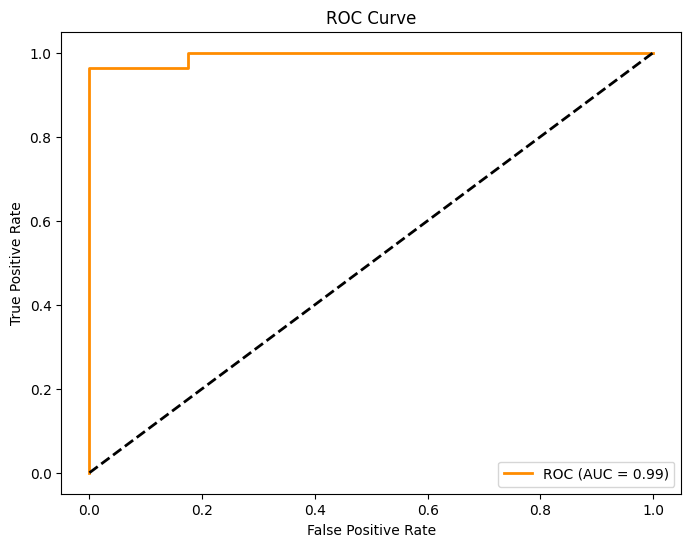

In [ ]:
# Load Model
model = load_model("C:\\Users\\skovv\\OneDrive\\Visual Studio Code Projects\\Projects\\ISEF_Pharyngitis\\savedModels\\customCNNmodel_withCycleGAN.hdf5", compile=False)

# Generate Predictions
y_pred = model.predict(X_test)  

output_shape = model.output_shape[1]  

if output_shape == 1:
    # Binary classification with sigmoid output
    y_pred = y_pred.flatten()  
else:
    if num_classes == 2:
        y_pred = y_pred[:, 1] 
    else:
        pass

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [5]:
print("Test samples:", len(y_pred))

Test samples: 141
